KOPIS 공모전 현황 그래프 자료 코드

In [1]:
#!pip install IPython 
from IPython.display import Image
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df= pd.read_csv('지역별_통계목록_2019.csv', header=None)
df1= pd.read_csv('지역별_통계목록_2020.csv', header=None)

In [3]:
# 2019년 자료 전처리
df = df.drop(index=[0,1,2,4])
df = df.T
df.columns = df.iloc[0]
df = df.drop(index=[0])
df.loc[5,'지역']='총객석수'
df.dropna(axis=0, inplace=True)
df.index = df['지역']
df = df.drop('지역', axis=1)

for i in df.columns :
    df[i]=df[i].str.replace(',','')
    df[i]=df[i].astype(int)

df = df.T

In [4]:
# 2020년 자료 전처리
df1 = df1.drop(index=[0,1,2,4])
df1 = df1.T
df1.columns = df1.iloc[0]
df1 = df1.drop(index=[0])

df1.loc[5,'지역']='총객석수'
df1.dropna(axis=0, inplace=True)

df1.index = df1['지역']
df1 = df1.drop('지역', axis=1)

for i in df1.columns :
    df1[i]=df1[i].str.replace(',','')
    df1[i]=df1[i].astype(int)

df1 = df1.T

df1.columns

Index(['공연시설', '공연장', '총객석수', '공연건수', '개막편수', '상연횟수', '예매수', '매출액'], dtype='object', name='지역')

In [5]:
df.index

Index(['서울', '경상', '부산', '대구', '경남', '경북', '울산', '경기/인천', '경기', '인천', '충청',
       '대전', '충남', '충북', '세종', '전라', '전북', '전남', '광주', '강원', '제주', '합계'],
      dtype='object', name=0)

In [6]:
data = df.loc[['서울', '경상', '경기/인천', '충청', '전라', '강원', '제주'],:]
data1 = df1.loc[['서울', '경상', '경기/인천', '충청', '전라', '강원', '제주'],:]

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib as mat

In [8]:
# 설치된 한글 폰트로 설정
mat.rcParams['font.family'] = 'HYGothic-Medium'

In [9]:
df = df.loc[['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남',
       '전북', '전남', '경북', '경남', '제주'],:]
df1 = df1.loc[['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남',
       '전북', '전남', '경북', '경남', '제주'],:]

In [11]:
import seaborn as sns

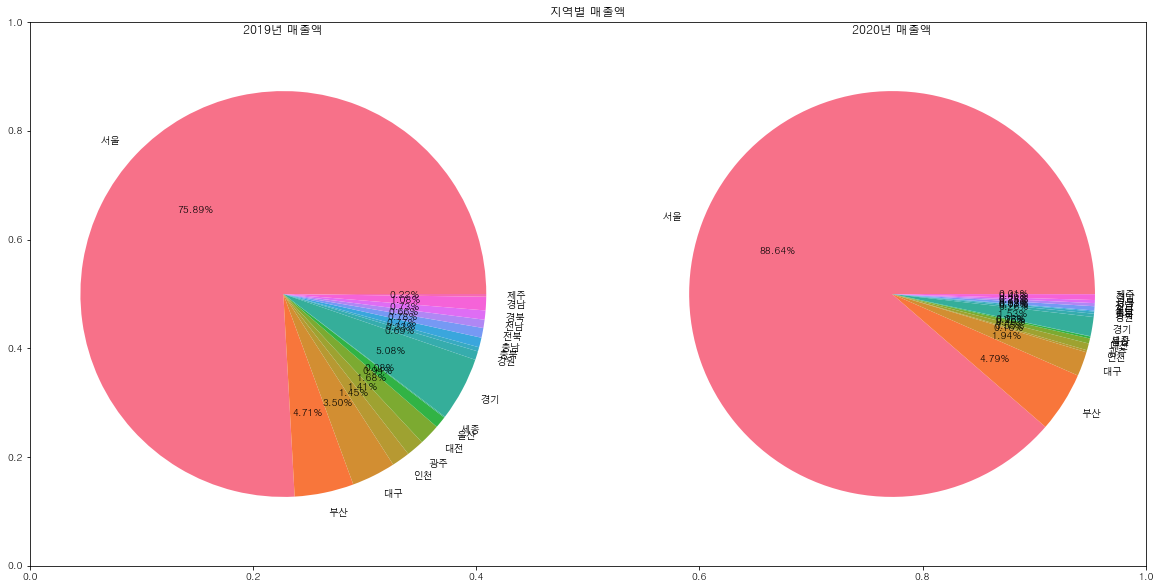

<Figure size 432x288 with 0 Axes>

In [22]:
fig = plt.figure(figsize = (20, 10))

colors = sns.color_palette('husl',len(df['매출액']))
plt.title('지역별 매출액')
ax1 = fig.add_subplot(1, 2, 1)
plt.title('2019년 매출액')
ax2 = fig.add_subplot(1, 2, 2)
plt.title('2020년 매출액')

ax1.pie(x=list(df['매출액']),labels=df.index, autopct=lambda p : '{:.2f}%'.format(p), colors=colors)
ax2.pie(x=list(df1['매출액']),labels=df1.index, autopct=lambda p : '{:.2f}%'.format(p), colors=colors)
plt.show()
plt.savefig('savefig_default.png')

<AxesSubplot:xlabel='0'>

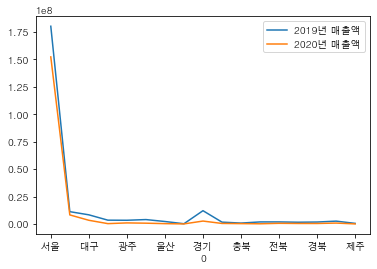

In [29]:
co = pd.concat([df['매출액'],df1['매출액']], axis=1)
co.columns = ['2019년 매출액','2020년 매출액']
co.plot()

<AxesSubplot:xlabel='0'>

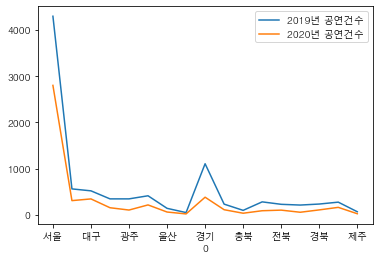

In [24]:
perform = pd.concat([df['공연건수'], df1['공연건수']], axis=1)
perform.columns = ['2019년 공연건수','2020년 공연건수']
perform.plot()

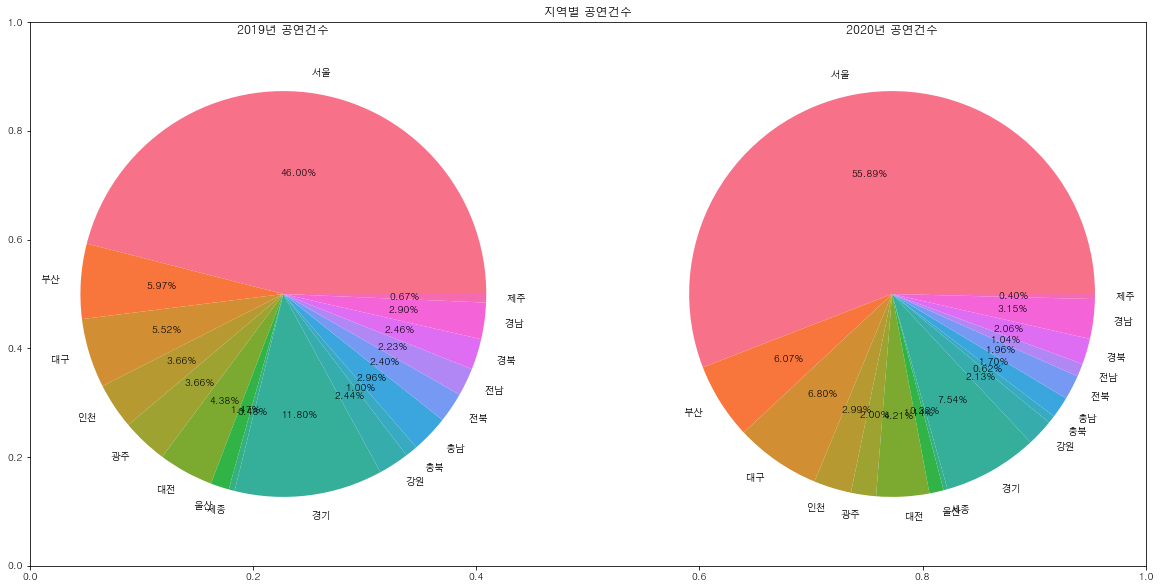

In [25]:
fig = plt.figure(figsize = (20, 10))

colors = sns.color_palette('husl',len(df['매출액']))

plt.title('지역별 공연건수')

ax1 = fig.add_subplot(1, 2, 1)
plt.title('2019년 공연건수')
ax2 = fig.add_subplot(1, 2, 2)
plt.title('2020년 공연건수')

ax1.pie(x=list(df['공연건수']),labels=df.index, autopct=lambda p : '{:.2f}%'.format(p), colors=colors)
ax2.pie(x=list(df1['공연건수']),labels=df1.index, autopct=lambda p : '{:.2f}%'.format(p), colors=colors)
plt.show()

In [31]:
# 매출액 높은 순으로 정리
pd.concat([sido['평균'], df['매출액']], axis=1).sort_values(by='매출액', ascending=False).T

,서울,경기,부산,대구,대전,인천,광주,경남,울산,전북,충남,경북,강원,전남,충북,제주,세종
평균,223,199,221,238,200,217,284,231,238,254,163,181,135,228,189,144,186
매출액,180286137,12078893,11199605,8316336,3982462,3443294,3355096,2561904,2221899,1842649,1837572,1741361,1642379,1561363,791378,510882,192585
